In [1]:
from glob import glob

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [2]:
IMG_SIZE = [224, 224]

In [3]:
train_dir = "../data/train"
test_dir = "../data/test"
val_dir = "../data/val"

In [4]:
vgg16 = VGG16(input_shape=IMG_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
# don't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

In [6]:
no_of_classes = len(glob('../data/train/*'))

# our layers - you can add more if you want
x = Flatten()(vgg16.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(no_of_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 561 images belonging to 3 classes.
Found 189 images belonging to 3 classes.


In [8]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
18/18 [==============================] - 180s 10s/step - loss: 0.9237 - accuracy: 0.6275 - val_loss: 0.3211 - val_accuracy: 0.8571
Epoch 2/5
18/18 [==============================] - 157s 9s/step - loss: 0.4137 - accuracy: 0.8324 - val_loss: 0.2478 - val_accuracy: 0.8730
Epoch 3/5
18/18 [==============================] - 162s 9s/step - loss: 0.2695 - accuracy: 0.8788 - val_loss: 0.2833 - val_accuracy: 0.8677
Epoch 4/5
18/18 [==============================] - 202s 11s/step - loss: 0.2340 - accuracy: 0.9127 - val_loss: 0.2173 - val_accuracy: 0.9206
Epoch 5/5
18/18 [==============================] - 182s 10s/step - loss: 0.1622 - accuracy: 0.9376 - val_loss: 0.2207 - val_accuracy: 0.9048


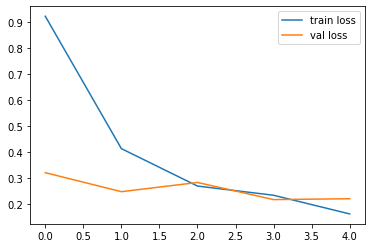

In [9]:
import matplotlib.pyplot as plt

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [16]:
test_files = glob("../data/test_image/*.png")

In [29]:
img_arr.shape

(224, 224, 3)

In [30]:


predictions = model.predict(np.array([img_arr]))

0

In [37]:
result = []

for file in test_files:
    img = load_img(file, grayscale=False, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
    img_arr = np.array([img_to_array(img)])
    predictions = model.predict(img_arr)
    
    filename = file.split("/")[-1]
    img_id = filename.split(".")[0]
    result.append([img_id, np.argmax(predictions)])

In [38]:
result

[['176', 1],
 ['88', 1],
 ['162', 1],
 ['189', 0],
 ['77', 0],
 ['63', 1],
 ['228', 0],
 ['200', 1],
 ['214', 0],
 ['215', 1],
 ['201', 0],
 ['229', 1],
 ['62', 0],
 ['188', 0],
 ['76', 1],
 ['163', 0],
 ['177', 1],
 ['89', 0],
 ['149', 1],
 ['161', 1],
 ['175', 0],
 ['60', 0],
 ['74', 1],
 ['48', 0],
 ['217', 1],
 ['203', 1],
 ['202', 0],
 ['216', 0],
 ['49', 1],
 ['75', 0],
 ['61', 0],
 ['174', 0],
 ['160', 0],
 ['148', 0],
 ['164', 2],
 ['170', 1],
 ['158', 0],
 ['59', 0],
 ['65', 1],
 ['71', 0],
 ['212', 0],
 ['206', 1],
 ['207', 0],
 ['213', 1],
 ['70', 0],
 ['64', 0],
 ['58', 1],
 ['159', 0],
 ['171', 0],
 ['165', 1],
 ['173', 0],
 ['167', 1],
 ['99', 0],
 ['8', 0],
 ['72', 1],
 ['198', 0],
 ['66', 1],
 ['205', 1],
 ['211', 1],
 ['239', 0],
 ['238', 1],
 ['210', 0],
 ['204', 1],
 ['199', 1],
 ['67', 0],
 ['73', 1],
 ['9', 0],
 ['166', 1],
 ['98', 1],
 ['172', 1],
 ['129', 1],
 ['115', 1],
 ['101', 1],
 ['14', 2],
 ['28', 0],
 ['263', 1],
 ['277', 2],
 ['288', 1],
 ['289', 2],
 ['